In [1]:



import numpy as np 
import math as math

import time                  
import pandas as pd         
import matplotlib.pyplot as plt


In [2]:

def objective_calculator(solution,dataset): #Calculates the objective function value (cost) of any solution (tour)
    cost = 0
    for i in range(len(solution)-2):                     
        cost += euclid_calculator(solution[i], solution[i+1],dataset)  #To the euclid_calculator function, send the cities in the solution whose objective function value will be calculated, two at a time
    
    return cost
        

def euclid_calculator(city_1, city_2, dataset): #Calculates the euclidean distance between any two cities in the dataset
    
    return math.sqrt((dataset.loc[city_1-1,"x"]-dataset.loc[city_2-1,"x"])**2 + (dataset.loc[city_1-1,"y"]-dataset.loc[city_2-1,"y"])**2) #Calculates the euclidean distance with formula using the city coordinates in the "dataset" dataframe
    
    
def city_swap(city_1,city_2,current_solution,dataset): 
    
    tour_choice=current_solution.copy()                #In these lines, an array called tour_choice is created to try the swap on that array first.
    keeper=tour_choice[city_1].copy()
    tour_choice[city_1]=tour_choice[city_2].copy()
    tour_choice[city_2]=keeper 
    
    if objective_calculator(tour_choice,dataset) < objective_calculator(current_solution,dataset): #The objective function values ​​of the new tour we tried and the previous tour are compared, checking if the new solution is better
        print("Current cost: ",objective_calculator(tour_choice,dataset))        #The objective function value of the tour, which is the better solution, is printed
        current_solution=tour_choice                                             #The better tour found is assigned to current_solution i.e. kept in that variable 
        print("Current tour:", current_solution)                                 #The new solution is printed
        print("-------------------------------------------------------------")
    return current_solution
        
def printpath(dataset,path):
    x=np.array(dataset['x'])
    #print(x)
    #x.append(x[0])
    y=np.array(dataset['y'])
    #print(y)
    #y.append(y[0])
    n= [i for i in range (1,len(path))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    x=[dataset['x'][i-1] for i in path]
    #print(x)
    #x.append(x[0])
    y=[dataset['y'][i-1] for i in path]
    #print(y)
    #y.append(y[0])
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=1)  

        
def main(dataset): #Argument of the main function is the dataset of the coordinates of the cities in "euclidean space"
    np.random.seed(28) #You can choose random seed
    partly_initial_solution= np.random.permutation(range(1,len(dataset)+1))  #Randomly sorts the city numbers and creates the starting tour (starting solution)
    initial_solution = np.append(partly_initial_solution, [partly_initial_solution[0]]) #Adds the city at the beginning of the tour to the end of the tour to make the salesman return to where he started
    
    current_solution = initial_solution #Assigns the initial solution to the current solution 
    for k in range(10): #Trying to swap all cities with each other using nested for loops (You can change that "10" as you wish)
        for i in range(1,len(dataset)-1):
            for j in range(i+1,len(dataset)):
                current_solution = city_swap(i,j,current_solution,dataset) #The cities to be swapped in the loop are sent to the city_swap function, with the current solution and dataset
        
    print("Results:")
    print("-> Cost of best solution: ", objective_calculator(current_solution,dataset))
    print("-> Best Tour Found: ", current_solution)    
    return(current_solution)

In [3]:

import time                  
import pandas as pd         



dataset = pd.read_csv('dataset.csv')     #Import the csv file containing the data


start_time = time.time()                 #Keeps the start time
solution1 = main(dataset)              #Runs our algorithm with dataset as argument 
comp_time = time.time() - start_time     #Keeps the difference between the end time and the start time
print(f"-> Computational Time: {comp_time} seconds")     #Prints Computational Time


Current cost:  1683.1837854886114
Current tour: [49 36 22 12 19 30 11 48 21 38 10 47 27 26 34 17 18 42 35 43 16 32 40  5
  7 41 28 44 20  3 37 14 15 51  8 39 29 31 25  9 50 45 46  1 13 24  4 33
 23  6  2 49]
-------------------------------------------------------------
Current cost:  1668.703244332802
Current tour: [49 48 22 12 19 30 11 36 21 38 10 47 27 26 34 17 18 42 35 43 16 32 40  5
  7 41 28 44 20  3 37 14 15 51  8 39 29 31 25  9 50 45 46  1 13 24  4 33
 23  6  2 49]
-------------------------------------------------------------
Current cost:  1668.6629662074126
Current tour: [49 10 22 12 19 30 11 36 21 38 48 47 27 26 34 17 18 42 35 43 16 32 40  5
  7 41 28 44 20  3 37 14 15 51  8 39 29 31 25  9 50 45 46  1 13 24  4 33
 23  6  2 49]
-------------------------------------------------------------
Current cost:  1668.5242677946414
Current tour: [49 26 22 12 19 30 11 36 21 38 48 47 27 10 34 17 18 42 35 43 16 32 40  5
  7 41 28 44 20  3 37 14 15 51  8 39 29 31 25  9 50 45 46  1 13 24  4 

Current cost:  1285.827180341239
Current tour: [49 50  2 45 17 12 22 36 21 30 11 48 27 10 38 47 19 18 26 43 35 42 40 32
  7  5 16 28 20 44 37 41 14 51  8  3 29 31 34 39 15  9 46 25 13 24  1  4
 23  6 33 49]
-------------------------------------------------------------
Current cost:  1278.7541558450346
Current tour: [49 50  2 45 44 12 22 36 21 30 11 48 27 10 38 47 19 18 26 43 35 42 40 32
  7  5 16 28 20 17 37 41 14 51  8  3 29 31 34 39 15  9 46 25 13 24  1  4
 23  6 33 49]
-------------------------------------------------------------
Current cost:  1276.3551660773014
Current tour: [49 50  2 45 37 12 22 36 21 30 11 48 27 10 38 47 19 18 26 43 35 42 40 32
  7  5 16 28 20 17 44 41 14 51  8  3 29 31 34 39 15  9 46 25 13 24  1  4
 23  6 33 49]
-------------------------------------------------------------
Current cost:  1268.6986738220824
Current tour: [49 50  2 45 33 12 22 36 21 30 11 48 27 10 38 47 19 18 26 43 35 42 40 32
  7  5 16 28 20 17 44 41 14 51  8  3 29 31 34 39 15  9 46 25 13 24  1 

Current cost:  961.1601047417839
Current tour: [49 50  2 45 33 37  9 34 20 16 11 46 51 32 12 17 47 48 26 43 19 42 40 10
 22 36 35 28  7 18 44 41 14 27  8  3 29 21 30 39 15  5 38 25 13 24 31  1
 23  6  4 49]
-------------------------------------------------------------
Current cost:  960.4845899841106
Current tour: [49 50  2 45 33 37  9 34 20 16 11 46 51 32 12 17  4 48 26 43 19 42 40 10
 22 36 35 28  7 18 44 41 14 27  8  3 29 21 30 39 15  5 38 25 13 24 31  1
 23  6 47 49]
-------------------------------------------------------------
Current cost:  954.9423424793521
Current tour: [49 50  2 45 33 37  9 34 20 16 11 46 51 32 12 17  4  7 26 43 19 42 40 10
 22 36 35 28 48 18 44 41 14 27  8  3 29 21 30 39 15  5 38 25 13 24 31  1
 23  6 47 49]
-------------------------------------------------------------
Current cost:  953.6437877525703
Current tour: [49 50  2 45 33 37  9 34 20 16 11 46 51 32 12 17  4 27 26 43 19 42 40 10
 22 36 35 28 48 18 44 41 14  7  8  3 29 21 30 39 15  5 38 25 13 24 31  1


Current cost:  684.5642980742592
Current tour: [49 50  2 45 33 37  9 34 20 16 11 46 51 32 12 17  4 47  6 41 40 19 42 15
 38 35 36 28 31 26  8  1 27 48 22  3 29 21 30 39 10  5 44 18 13 25 14 24
 23  7 43 49]
-------------------------------------------------------------
Current cost:  684.1918475521256
Current tour: [49  9  2 45 33 37 50 34 20 16 11 46 51 32 12 17  4 47  6 41 40 19 42 15
 38 35 36 28 31 26  8  1 27 48 22  3 29 21 30 39 10  5 44 18 13 25 14 24
 23  7 43 49]
-------------------------------------------------------------
Current cost:  678.8343938751034
Current tour: [49 20  2 45 33 37 50 34  9 16 11 46 51 32 12 17  4 47  6 41 40 19 42 15
 38 35 36 28 31 26  8  1 27 48 22  3 29 21 30 39 10  5 44 18 13 25 14 24
 23  7 43 49]
-------------------------------------------------------------
Current cost:  657.8958932434184
Current tour: [49 38  2 45 33 37 50 34  9 16 11 46 51 32 12 17  4 47  6 41 40 19 42 15
 20 35 36 28 31 26  8  1 27 48 22  3 29 21 30 39 10  5 44 18 13 25 14 24


Results:
-> Cost of best solution:  519.7089573408291
-> Best Tour Found:  [49 38  5 10 39 30 34 50 16  2 11 32 27 51 46 12 47 18 13 41 40 19 42 44
 20 35 36 28 31 26  8 48  6  1 22  3 29 21  9 33 45 15 37 17  4 25 14 24
 23  7 43 49]
-> Computational Time: 85.91033387184143 seconds


In [4]:
solution1

array([49, 38,  5, 10, 39, 30, 34, 50, 16,  2, 11, 32, 27, 51, 46, 12, 47,
       18, 13, 41, 40, 19, 42, 44, 20, 35, 36, 28, 31, 26,  8, 48,  6,  1,
       22,  3, 29, 21,  9, 33, 45, 15, 37, 17,  4, 25, 14, 24, 23,  7, 43,
       49])

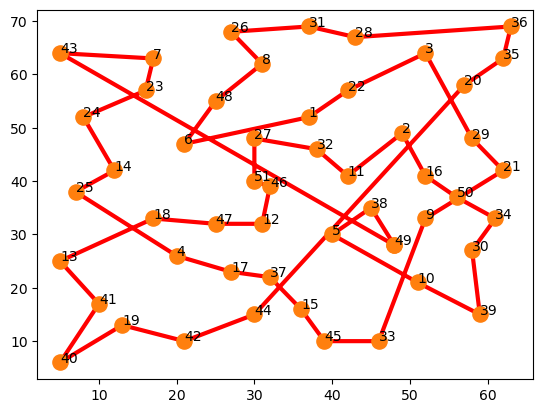

In [5]:
printpath(dataset,solution1)


genetic algorithm

In [6]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [7]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


In [8]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [9]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [10]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [11]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [12]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [13]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [14]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child


In [15]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [16]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [17]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [18]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [19]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    
    for i in range(0, generations):
        if i%10==0 and i>0:
            print(i,':',str(1 / rankRoutes(pop)[0][1]))
        pop = nextGeneration(pop, eliteSize, mutationRate)#[0:popSize]
        #print(len(pop))
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [20]:
def getCity():
    cities = []
    f = open("TSP51.txt")
    for i in f.readlines():
        node_city_val = i.split()
        cities.append(City(float(node_city_val[1]), float(node_city_val[2])))
    return cities

cityList = getCity()



In [21]:
population=cityList
popSize=100
eliteSize=20
mutationRate=0.001
generations=300
best=geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations)

10 : 1265.372546840098
20 : 1172.6671188071182
30 : 1049.6573987837794
40 : 948.446007757407
50 : 891.3080478505209
60 : 851.9752978689171
70 : 775.570574186666
80 : 767.7634457157613
90 : 748.5695492408555
100 : 710.3767948742696
110 : 703.13956884953
120 : 687.7165778680336
130 : 686.3557588072333
140 : 682.7027068048316
150 : 664.1487709736931
160 : 644.9806099586621
170 : 644.9806099586621
180 : 639.3530528328196
190 : 633.5558291674113
200 : 615.351996990756
210 : 615.351996990756
220 : 615.351996990756
230 : 613.1296317830952
240 : 612.8847697468104
250 : 600.7528366197738
260 : 600.4567998629506
270 : 598.7528366197739
280 : 598.1602562556848
290 : 598.1602562556848
Final distance: 598.1602562556848


the result that we are getting is observed in nature. mutations are not usually beneficial to creatures, they are rather in most cases destructive. setting the mutation rate too high is similar to exposing the population to high levels of radiations for multiple generations. the result will be a population of freaks that cannot survive in the outside world(in our case, are not as competitive as the first generation members)

In [243]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

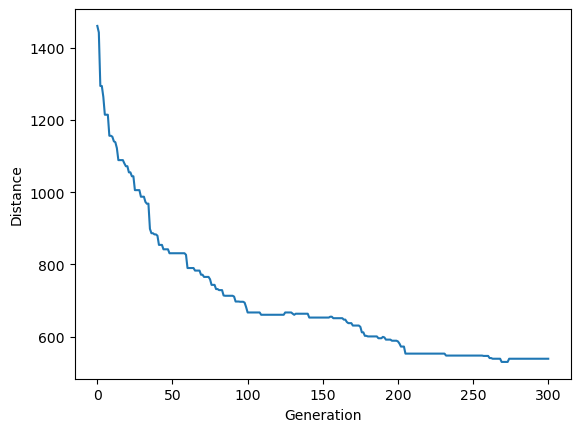

In [200]:
geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations)

In [22]:
def dist(p,i,j):
    return (((p[i][0]-p[j][0])**2)+((p[i][1]-p[j][1])**2))**0.5
def custompath(p,path):
    d=0
    for i in range(0,len(path)):
        d+=dist(p,path[i],path[i-1])
        #d+=dist(p,path[-1], path[0])
    return d
p=[]
for city in best:
    p.append((city.x,city.y))
l=[i for i in range(len(p))]
custompath(p,l)


598.1602562556847

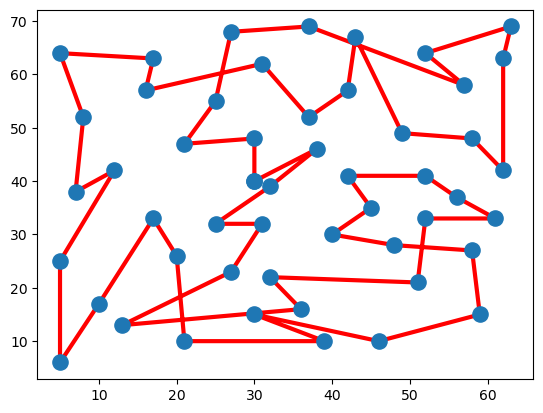

In [23]:
def printpath(p,path):
    
    x=[p[i][0] for i in path]
    x.append(x[0])
    y=[p[i][1] for i in path]
    y.append(y[0])
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=2)

printpath(p,l)
    


a more nature-like experiment is to make the mutation pass from a generation to another only if it is useful( if it is fitter than the father)

In [24]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        testnomutation=True
        f1=Fitness(population[ind])
        f1=f1.routeFitness()
        mutatedInd = mutate(population[ind], mutationRate)
        f2=Fitness(mutatedInd)
        f2=f2.routeFitness()
        #print(ind, (f2>f1) and (testnomutation))
        if (f2>f1) and (testnomutation):
            mutatedPop.append(mutatedInd)
            testnomutation=False
            
        if testnomutation:
            mutatedPop.append(population[ind])
            
            
    return mutatedPop

In [25]:
population=cityList
popSize=100
eliteSize=20
mutationRate=0.001
generations=300
best=geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations)

10 : 1203.5614966779483
20 : 1085.1249565541398
30 : 943.836272415867
40 : 906.8890448047077
50 : 842.2129798219546
60 : 815.5905604062066
70 : 801.7642537964042
80 : 795.1100677717889
90 : 765.0290836484485
100 : 760.7360827023527
110 : 744.0597701348747
120 : 730.9362722783353
130 : 729.5710871963719
140 : 709.1342432162585
150 : 707.2972297735341
160 : 705.4042468913352
170 : 699.0734680966483
180 : 685.3963071963009
190 : 676.2104161355103
200 : 666.0621173648191
210 : 663.2629852689241
220 : 664.8633285972838
230 : 650.105437520412
240 : 644.730321130326
250 : 627.3665595439757
260 : 624.9743299118633
270 : 624.9743299118632
280 : 624.9743299118632
290 : 605.6662176066079
Final distance: 597.8056317570922


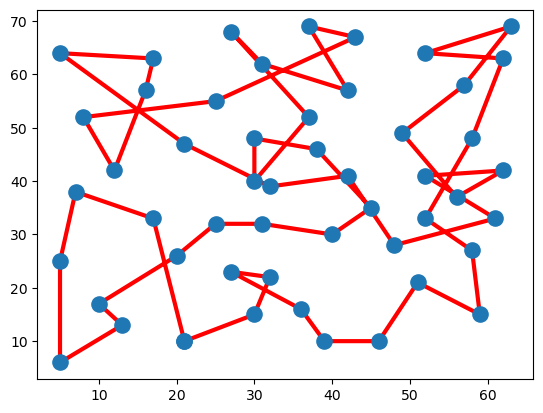

In [26]:
p=[]
for city in best:
    p.append((city.x,city.y))
l=[i for i in range(len(p))]
custompath(p,l)
printpath(p,l)

since we have controlled mutation now, we can perhapse make a higher mutation rate and get away with it

In [27]:
population=cityList
popSize=100
eliteSize=20
mutationRate=0.5
generations=300
best=geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations)

10 : 1411.7241175751503
20 : 1418.4595208669436
30 : 1490.205415290682
40 : 1448.432537210134
50 : 1404.8432721143506
60 : 1414.888500258228
70 : 1444.0621979974264
80 : 1369.6247594193649
90 : 1446.0786835955805
100 : 1478.1153052483642
110 : 1374.9975919493336
120 : 1408.783538765166
130 : 1388.5117574373808
140 : 1420.0167881485768
150 : 1396.9975059718147
160 : 1405.487661773254
170 : 1343.3043415618017
180 : 1449.4802754500854
190 : 1364.9187026169056
200 : 1404.341032553981
210 : 1431.262288217184
220 : 1441.7566237410574
230 : 1418.1987613626911
240 : 1430.607847042516
250 : 1404.36826152425
260 : 1396.4458570728018
270 : 1432.9922341888898
280 : 1452.6664679476098
290 : 1484.5855010639248
Final distance: 1381.9142894932284


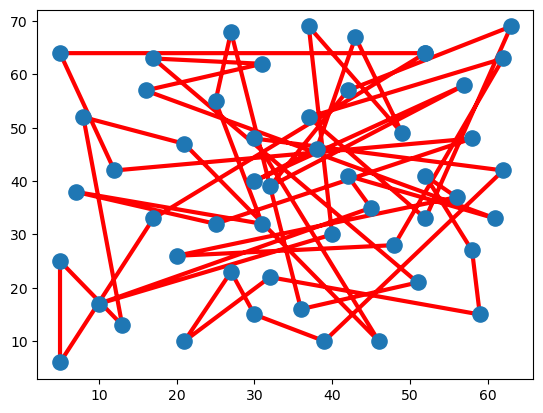

In [28]:
p=[]
for city in best:
    p.append((city.x,city.y))
l=[i for i in range(len(p))]
custompath(p,l)
printpath(p,l)

even with all the precautions we took, it is still useless to try anything under the condition of high mutation rate. it is as if evolution would not work in the most perfect conditions given that the environment is radioactive. it is the mating that causes every generation to be "weaker" than the previous one

now we will repeat the experiment ,with the initial conditionsof commplete randomness, with a carefully chosen first generation

In [29]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [30]:
import pickle

# write list to binary file
def write_list(a_list):
    # store list in binary file so 'wb' mode
    with open('listfile', 'wb') as fp:
        pickle.dump(a_list, fp)
        print('Done writing list into a binary file')

# Read list to memory
def read_list():
    # for reading also binary mode is important
    with open('the fathers', 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

# list of names


fathers= read_list()
print('List is',fathers)



def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route
def initialPopulation(popSize, cityList):
    population = []
    population1=[]
    for i in fathers:
        for j in i:
            population1.append(cityList[j])
        population.append(population1)
    return population

List is [[27, 30, 25, 7, 21, 0, 26, 47, 6, 22, 42, 23, 24, 13, 5, 50, 46, 17, 3, 16, 12, 40, 39, 18, 41, 43, 44, 32, 14, 36, 11, 45, 31, 10, 37, 4, 48, 8, 9, 38, 29, 33, 20, 49, 15, 1, 28, 19, 34, 35, 2], [17, 46, 45, 50, 5, 13, 24, 23, 42, 22, 6, 25, 30, 27, 7, 47, 26, 0, 31, 21, 1, 2, 35, 34, 19, 28, 20, 15, 10, 37, 49, 33, 29, 38, 9, 8, 48, 4, 11, 36, 14, 32, 44, 43, 41, 18, 39, 40, 12, 16, 3], [14, 32, 44, 41, 18, 39, 40, 12, 43, 36, 16, 3, 17, 11, 46, 10, 31, 45, 50, 5, 13, 24, 23, 42, 22, 6, 25, 30, 27, 7, 47, 26, 0, 21, 1, 2, 35, 34, 19, 28, 20, 15, 49, 33, 29, 38, 9, 8, 48, 37, 4], [47, 23, 42, 22, 6, 25, 30, 27, 7, 0, 21, 1, 2, 35, 34, 19, 28, 20, 15, 49, 33, 29, 38, 9, 8, 48, 4, 37, 10, 31, 45, 11, 36, 14, 32, 44, 43, 41, 18, 39, 40, 12, 24, 13, 16, 3, 17, 46, 50, 26, 5], [22, 42, 23, 47, 5, 50, 46, 17, 3, 16, 13, 24, 12, 40, 39, 18, 41, 43, 44, 32, 14, 36, 11, 45, 26, 0, 31, 10, 37, 4, 48, 8, 9, 38, 29, 33, 49, 15, 20, 28, 1, 21, 19, 34, 35, 2, 27, 30, 7, 25, 6], [47, 6, 22,

In [31]:
population=cityList
popSize=50
eliteSize=20
mutationRate=0.0000001
generations=100
best=geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations)

10 : 494.20487379854507
20 : 494.20487379854507
30 : 491.40619741546743
40 : 491.40619741546743
50 : 491.4061974154673
60 : 491.4061974154673
70 : 491.4061974154673
80 : 491.4061974154673
90 : 491.4061974154673
Final distance: 491.4061974154673


In [32]:
p=[]
for city in best:
    p.append((city.x,city.y))
l=[i for i in range(len(p))]
custompath(p,l)


491.40619741546743

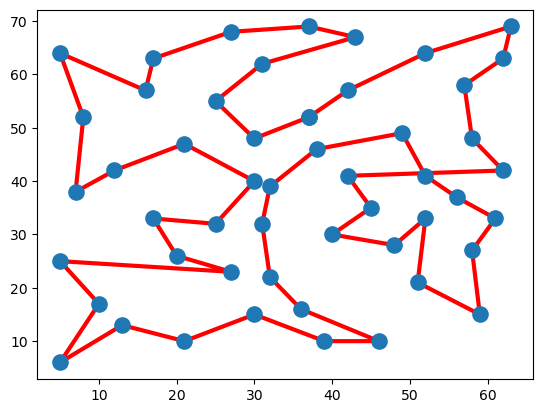

In [33]:

printpath(p,l)
    

these are the best results so far, the most effective way to get a result from a genetic algorithm is to start with a population of elites

again, if it is very dangerous to expose individuals with average and below average genes to radiations(high mutation rate), it is even worse to expose high qulity genes to it. actually high quality genes would be more impacted by any increase in the mutation rate because this is like breeding special races together. the genes in question are already of high quality and in most cases, random mutations will not add a good gene to the set, it will most likely destroy a good gene, replacing it by less fitting one.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time 

In [35]:
def createrandomp(n):
    

    p=[]
    for i in range(n):
        while True:
            a=np.random.random()
            b=np.random.random()

            if not((a,b) in p):
                p.append((a,b))
                break
    return p

def plot(p):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
def dist(p,i,j):
    return (((p[i][0]-p[j][0])**2)+((p[i][1]-p[j][1])**2))**0.5


def custompath(p,path):
    d=0
    for i in range(0,len(path)):
        d+=dist(p,path[i],path[i-1])
        #d+=dist(p,path[-1], path[0])
    return d
            
def printpath(p,path):
    
    x=[p[i][0] for i in path]
    x.append(x[0])
    y=[p[i][1] for i in path]
    y.append(y[0])
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=2)
    

In [36]:
def createinitials(p):
    l=[]
    
    for i in range (len(p)):
        '''for j in range(i+1,len(p)):
            for k in range (j+1,len(p)):
                l.append([i,j,k])'''
        l.append([i])
        
    return l
                        
                    

In [37]:
def addpt(p,l):
    l1=[]
    for init in l:
        
        #print("init:", init)
        length=custompath(p,init)
        m=length+10
        for i in range (len(p)):
           
            
            
            if not(i in init):
                for j in range(len(init)):
                    init1=init.copy()
                    init1.insert(j,i)
                    #print(init1,custompath(p,init1)-custompath(p,init),m)
                    if custompath(p,init1)-length<m:
                        #print('change', init1)
                        best=init1.copy()
                        #print(best)
                        m=custompath(p,init1)-length
        #print('chosen', best)
        l1.append(best)
    return l1

In [38]:
def addall(p,l):
    l1=addpt(p,l)
    print(len(l1[0]))
    if len(l1[0])!=len(p):
        return addall(p,l1)
    else:
        return l1

In [39]:
def bestpath(p, paths):
    lengths=[]
    for i in paths:
        lengths.append (custompath(p, i))
    #print(lengths)
    #print(paths)
    minim=lengths[0]
    optim=paths[0]
    for i in range(len(lengths)):
        if lengths[i]<minim:
            minim=lengths[i]
            optim= paths[i]
    print(minim)
    return optim


# test: choose number of cities n 

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
5.022019095498525
time spent:  4.4168665409088135 s for  30 points


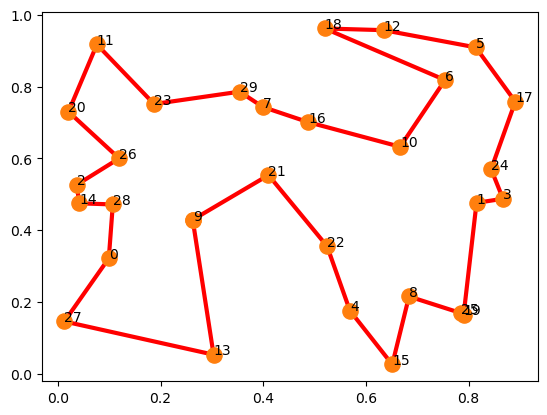

In [40]:
n=30
p=createrandomp(n)

plot(p)
t=time.time()
l= createinitials(p)
paths= addall(p,l)
best=bestpath(p, paths)
printpath(p,best)
leng1=custompath(p,best)
print('time spent: ', time.time()-t, 's for ', n , 'points')

now that it works let's try it on the example

In [267]:

import time                  
import pandas as pd         



dataset = pd.read_csv('dataset.csv')  

In [268]:
p=[]
for i in np.array(dataset):
    p.append((i[1],i[2]))
    

In [269]:
p=np.array(p)/100

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
4.7400315773595905
time spent:  57.31866812705994 s for  30 points


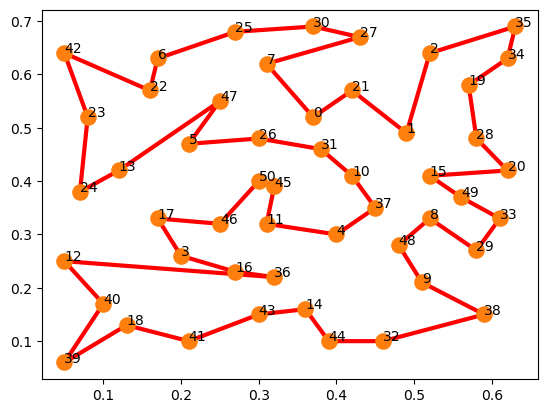

In [270]:

plot(p)
t=time.time()
l= createinitials(p)
paths= addall(p,l)
best=bestpath(p, paths)
printpath(p,best)
leng1=custompath(p,best)
print('time spent: ', time.time()-t, 's for ', n , 'points')

this looks good enough to think this might be the optimum solution, I mean, no meta heristic has ever made anything that close to perfection, so it is legitimate to wonder what we are dealing with here. so let'ss try it on an example that we already have a solution for:

In [271]:
def getCity():
    cities = []
    f = open("wi29.tsp")
    for i in f.readlines():
        if not( "EOF" in i):
            
            node_city_val = i.split()
            cities.append((float(node_city_val[1]), float(node_city_val[2])))
    return cities

In [272]:
p=getCity()

In [273]:
p=np.array(p)/100000
p

array([[0.20833333, 0.171     ],
       [0.209     , 0.17066667],
       [0.213     , 0.13016667],
       [0.216     , 0.1415    ],
       [0.216     , 0.14966667],
       [0.216     , 0.165     ],
       [0.22183333, 0.13133333],
       [0.22583333, 0.143     ],
       [0.22683333, 0.12716667],
       [0.23616667, 0.15866667],
       [0.237     , 0.15933333],
       [0.23883333, 0.14533333],
       [0.24166667, 0.1325    ],
       [0.25149167, 0.12365833],
       [0.26133333, 0.145     ],
       [0.2615    , 0.1055    ],
       [0.26283333, 0.12766667],
       [0.26433333, 0.13433333],
       [0.2655    , 0.1385    ],
       [0.26733333, 0.11683333],
       [0.27026111, 0.13051944],
       [0.27096111, 0.13415833],
       [0.27153611, 0.13203333],
       [0.27166667, 0.09833333],
       [0.27233333, 0.1045    ],
       [0.27233333, 0.11783333],
       [0.27266667, 0.10383333],
       [0.27433333, 0.124     ],
       [0.274625  , 0.12992222]])

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0.29491888749486467
time spent:  4.013063192367554 s for  30 points


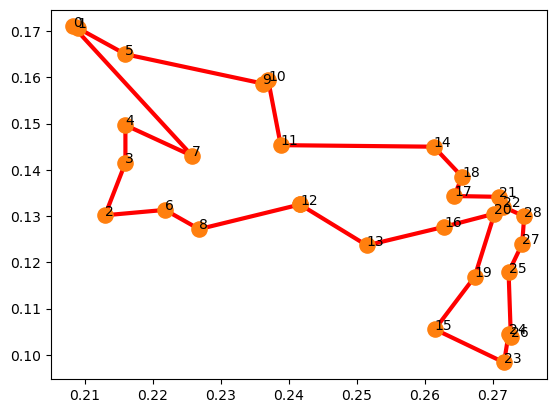

In [274]:

plot(p)
t=time.time()
l= createinitials(p)
paths= addall(p,l)
best=bestpath(p, paths)
printpath(p,best)
leng1=custompath(p,best)
print('time spent: ', time.time()-t, 's for ', n , 'points')

<img src="witour (1).jpg" alt="Alternative text" />

obviously, the solutions are differnet in some parts. the latter is the actual solution and its cost is :

In [275]:
custompath(p,[12,
 8,
 6,
 2,
 3,
 7,
 4,
 0,
 1,
 5,
 9,
 10,
 11,
 14,
 18,
 17,
 16,20,21,28,27,25,19,24,26,23,15,13])

0.2756697027326942

the marge of error of the algorithm

In [276]:
(0.29491888749486467-0.2756697027326942)/0.2756697027326942

0.06982698704774107

6% between the optimum solution and the solution suggested by the algorithm. 

in conclusion, deterministic algorithms such as the swap city and mine perform way better than the stochastic approach implemented in the genetic algorithm. this might implicate that


1- our problem has a solution that depends only on the inputs of the problem. using the stochastic approach is usually useful when there are information that are necessary to solve the problem but not given so we resort to guessing them, which is not the case here.


2- simply, evolution doesn't work.